In [1]:
import numpy as np
import pandas as pd
import csv
with open(r"C:\Users\roman\Desktop\DMS_data\DMS_data\GFP_AEQVI_Sarkisyan_2016.csv") as dms_GFP_datei:
    dms_GFP_datei_object = csv.reader(dms_GFP_datei, delimiter=',')
    print(dms_GFP_datei_object)
    for row in dms_GFP_datei_object:
        print(row)
GFP_dataset = pd.read_csv(r"C:\Users\roman\Desktop\DMS_data\DMS_data\GFP_AEQVI_Sarkisyan_2016.csv")
print(GFP_dataset)
#Import the dataset

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



                                      mutant  \
0      K3R:V55A:Q94R:A110T:D117G:M153K:D216A   
1                       K3Q:V16A:I167T:L195Q   
2                K3Q:Y143C:N164D:S205P:A227T   
3                            K3Q:Y143N:V193A   
4                                        K3R   
...                                      ...   
51709                                  Y237N   
51710                                  Y237C   
51711                                  Y237D   
51712                                  Y237F   
51713                                  Y237H   

                                        mutated_sequence  DMS_score  \
0      MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   1.301030   
1      MSQGEELFTGVVPILAELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.137350   
2      MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   1.553913   
3      MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.404237   
4      MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.738586 

      New_AS  Fitness_Score
4          R       3.738586
48         Q       3.750487
703        E       3.666278
924        M       3.698336
1160       T       3.629775
...      ...            ...
51709      N       3.809468
51710      C       3.760217
51711      D       3.754101
51712      F       3.673173
51713      H       3.735417

[1084 rows x 2 columns]


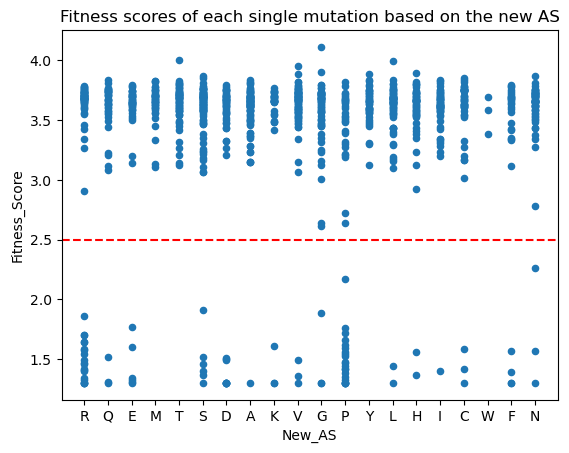

In [7]:
letzter_buchstabe = []
for index, row in GFP_dataset.iterrows():
    last_character = row["mutant"][-1]
    letzter_buchstabe.append(last_character)
letzter_buchstabe_df = pd.DataFrame(letzter_buchstabe, columns=["New_AS"])
#Letzter Buchstabe in jeder Zeile

number_mutations = GFP_dataset["mutant"].str.count(":") + 1
number_mutations_Single = number_mutations == 1
#True sind alle Zeilen, die nur eine Mutation tragen

single_mutants_df = letzter_buchstabe_df[number_mutations_Single]
#Filtert alle True Zeilen aus beiden Dataframes und erstellt ein neues Dataframe. Er übernimmt automatisch die Filterung nach "True"-Werten
dms_score_df = []
for index, row in GFP_dataset.iterrows():
    dms_score = row["DMS_score"]
    dms_score_df.append(dms_score)
dms_score_df_alle = pd.DataFrame(dms_score_df, columns=["Fitness_Score"])
#erstellt Dataframe mit allen DMS-scores und der jeweiligen Experimentnummer

dms_score_filtered = dms_score_df_alle[number_mutations_Single]
#Dataframe mit allen DMS-scores der Einzelmutanten

dms_score_filtered_newAS = single_mutants_df.join(dms_score_filtered)
print(dms_score_filtered_newAS)
#Kombiniert und erstellt ein neues Dataframe mit der neuen AS und dem jeweiligen DMS-score
import matplotlib.pyplot as plt
dms_score_filtered_newAS.plot(x="New_AS", y="Fitness_Score", kind="scatter")
plt.title("Fitness scores of each single mutation based on the new AS")
threshold = 2.5
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
plt.show()
#Plot shows all the single mutants (new AA) with the corresponding dms-score. There is a clear cut off at 2.5 visible. Everything underneath is completely unfunctional

C:\Users\roman\AppData\Local\Temp\ipykernel_4684\1782711764.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cividis = plt.cm.get_cmap('cividis')


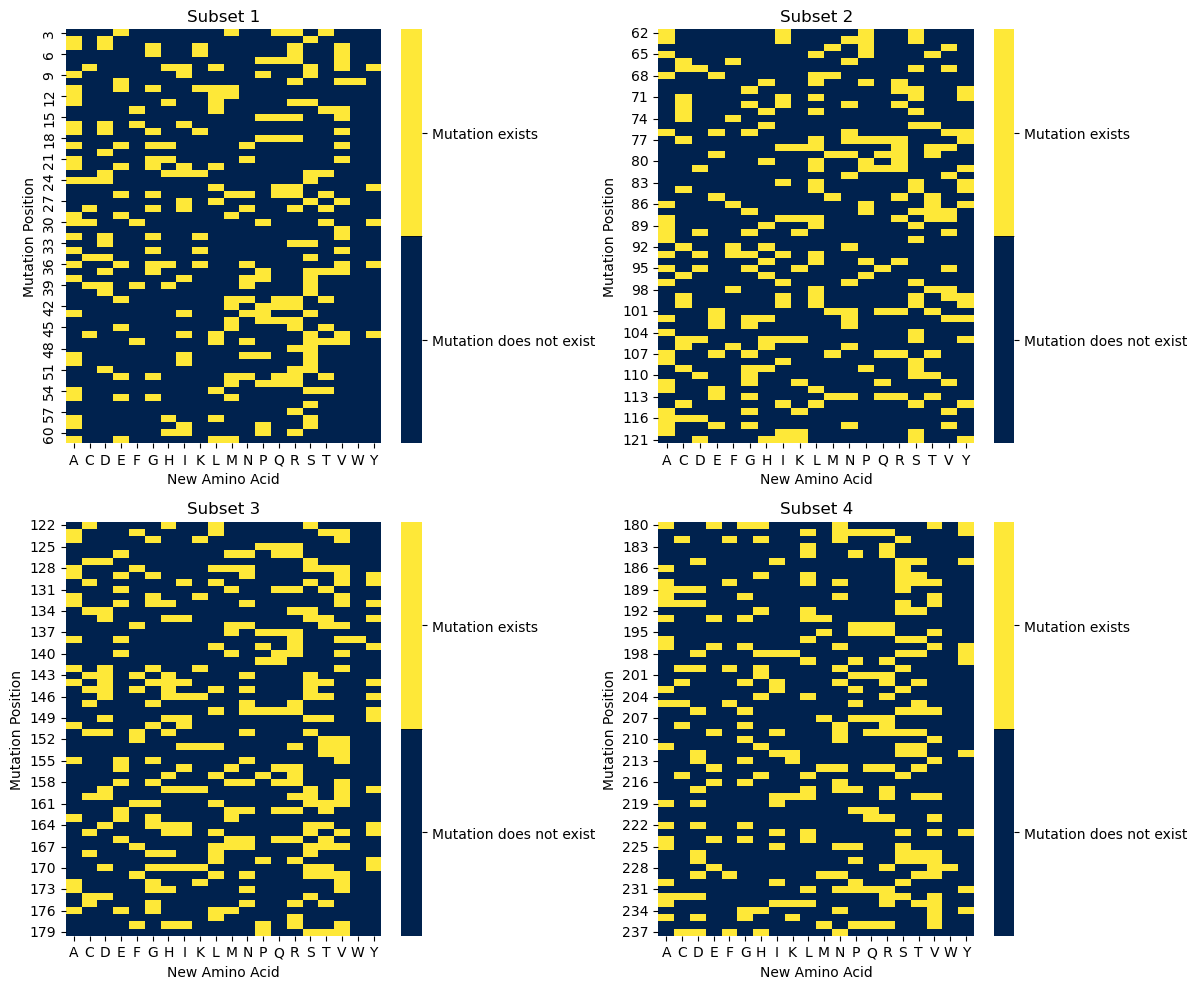

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

mutation_subsets = np.array_split(Roman_1['Position'].unique(), 4)  # Split into 4 subsets

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create a custom colormap with the first and last colors from 'cividis'
cividis = plt.cm.get_cmap('cividis')
colors = [cividis(0), cividis(255)]
cmap = ListedColormap(colors)

# Create a shared colorbar with two ticks for the two possibilities
cbar_ticks = [0.25, 0.75]
cbar_ticklabels = ['Mutation does not exist', 'Mutation exists']

# Define a custom sorting function for the y-axis values
def position_sort(position):
    if position.isdigit():
        return int(position)
    else:
        return position

# Iterate over subsets and create heatmaps
for i, subset in enumerate(mutation_subsets):
    row = i // 2
    col = i % 2

    # Filter data based on subset
    subset_df = Roman_1[Roman_1['Position'].isin(subset)]

    # Sort the data by "Mutation Position" column in ascending order
    subset_df = subset_df.sort_values('Position')

    # Create cross-tabulation
    cross_tab = pd.crosstab(subset_df['Position'], subset_df['New_AS'])

    # Sort the columns alphabetically for better visualization
    cross_tab_sorted = cross_tab.reindex(sorted(cross_tab.columns), axis=1)

    # Sort the rows based on the custom y-axis sorting function
    cross_tab_sorted = cross_tab_sorted.iloc[sorted(range(len(cross_tab_sorted)), key=lambda x: position_sort(cross_tab_sorted.index[x]))]

    # Create heatmap in the corresponding subplot
    ax = sns.heatmap(cross_tab_sorted, cmap=cmap, annot=False, fmt='d', ax=axes[row, col],
                     cbar_kws={'ticks': cbar_ticks, 'drawedges': True})

    axes[row, col].set_xlabel('New Amino Acid')
    axes[row, col].set_ylabel('Mutation Position')
    axes[row, col].set_title(f'Subset {i+1}')

    # Set colorbar tick labels
    cbar = ax.collections[0].colorbar
    cbar.set_ticklabels(cbar_ticklabels)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

#A heatmap to see which single mutations are available in the dataset and which are not.
#Only focuses on the new amino acid that occurs, not the old one before the mutation.

In [50]:
grouped_by_amino_acid = Roman_1.groupby('New_AS')
grouped_by_position = Roman_1.groupby("Position")
mean_dms_by_amino_acid = grouped_by_amino_acid["Fitness_Score"].mean()
median_dms_by_amino_acid = grouped_by_amino_acid["Fitness_Score"].median()
mean_dms_by_position = grouped_by_position["Fitness_Score"].mean()
median_dms_by_position = grouped_by_position["Fitness_Score"].median()
results_mean_median_AA_df = pd.DataFrame({
    "Mean DMS by Amino Acid": mean_dms_by_amino_acid,
    "Median DMS by Amino Acid": median_dms_by_amino_acid})
results_mean_median_pos_df = pd.DataFrame({
    "Mean DMS by Position": mean_dms_by_position,
    "Median DMS by Position": median_dms_by_position})
# Sort the DataFrame ascending position wise
results_mean_median_pos_df.sort_values("Position", inplace=True)

# Reset the index
results_mean_median_pos_df.reset_index(drop=True, inplace=True)
results_mean_median_pos_df["Position"] = results_mean_median_pos_df.index + 1

print(results_mean_median_pos_df)
print(results_mean_median_AA_df)
#General analysis of the mean and median of the dms-score of both factors: new amino acid and position of the mutation.

     Mean DMS by Position  Median DMS by Position  Position
0                3.537131                3.544708         1
1                3.086886                3.323669         2
2                3.684315                3.683229         3
3                3.546847                3.609839         4
4                3.554441                3.570019         5
..                    ...                     ...       ...
228              3.625334                3.640983       229
229              1.414276                1.361264       230
230              3.703226                3.695191       231
231              3.020505                3.486613       232
232              3.715067                3.732758       233

[233 rows x 3 columns]
        Mean DMS by Amino Acid  Median DMS by Amino Acid
New_AS                                                  
A                     3.568873                  3.635771
C                     3.484644                  3.659148
D                     3.2437

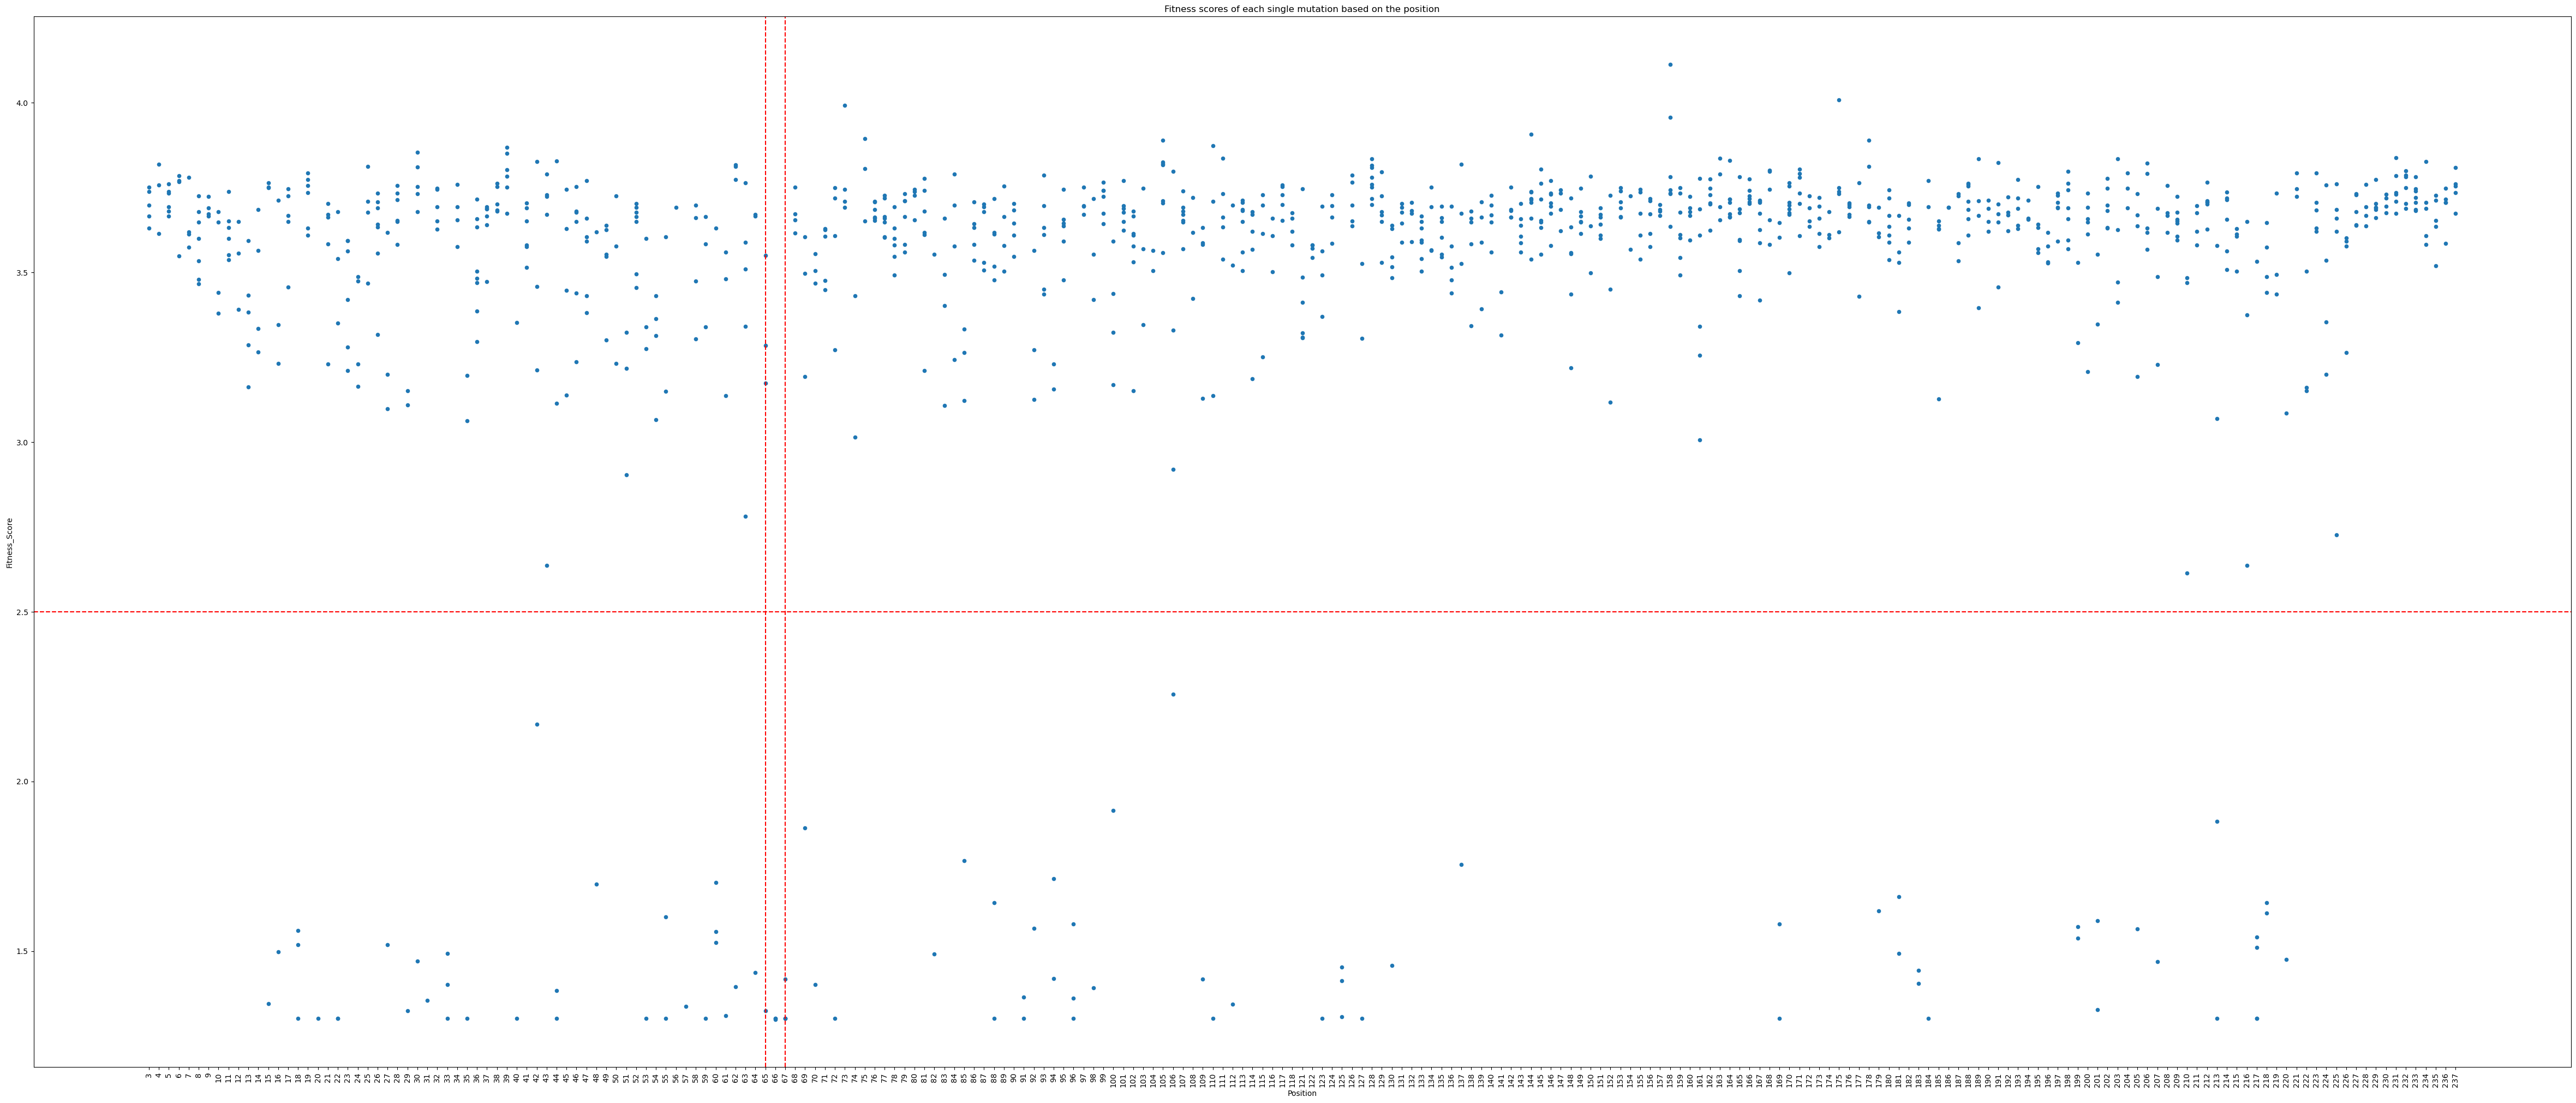

In [10]:
mutations_pos = []
for index, row in GFP_dataset.iterrows():
    mutations_pos_nummer = row["mutant"][1:-1]
    mutations_pos.append(mutations_pos_nummer)
mutations_pos_df = pd.DataFrame(mutations_pos, columns=["Position"])
#Entfernt erstmal nur das erste und letzte Zeichen
number_mutations = GFP_dataset["mutant"].str.count(":") + 1
number_mutations_Single = number_mutations == 1
#True sind alle Zeilen, die nur eine Mutation tragen

single_mutants_df_pos = mutations_pos_df[number_mutations_Single]
#Erstellt ein Dataframe, dass die Positionen innerhalb des Proteins aller Einzelmutanten zeigt

mutations_pos_df_mit_scores = single_mutants_df_pos.join(dms_score_filtered)
#Kombiniert und erstellt Dataframe mit der Position der Mutation und dem jeweiligen DMS-score (zeigt NICHT die neuen AS)

import matplotlib.pyplot as plt
mutations_pos_df_mit_scores.plot(x="Position", y="Fitness_Score", kind="scatter")
plt.title("Fitness scores of each single mutation based on the position")
#plt.figure(figsize=(100, 6))
#Macht das Diagramm auf Größe "Breite, Höhe" größer

#plt.xticks(rotation=45)  #
##Rotate the x-axis labels by 45 degrees

plt.xticks(rotation='vertical')
# Rotate the x-axis labels vertically
plt.gcf().set_size_inches(60, 25)
#Increase the width to 10 inches and height to 6 inches

a_threshold = 2.5
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
a_threshold_65 = 62
plt.axvline(a_threshold_65, color='red', linestyle='--', label='Threshold_65')
a_threshold_67 = 64
plt.axvline(a_threshold_67, color='red', linestyle='--', label='Threshold_67')
#Positionen 65-67 gehören zum Chromophor
#Interessant ist hier, dass es Mutationen gibt, die trotz Mutation im Chromophor an Position 65 einen guten score haben. Position 66 und 67 jedoch nicht
plt.show()

#Plot mit single Mutanten basierend auf Position der Mutation.!!!!!!!!!!!!!!!!!!
#Plot shows all the single mutations that occured at a specific position (x-axis) against the dms-score (y-axis)

In [13]:
new_column = mutations_pos_df_mit_scores["Position"]
Roman_1 = dms_score_filtered_newAS.join(new_column)
Roman_1 = Roman_1[["Position", "New_AS", "Fitness_Score"]]
#Erstellt neues Dataframe mit Position, neuer AS und DMS-score

gesuchte_AS = "R"
#Spezifische AS nach der ich suche
maske_gesuchte_AS = Roman_1["New_AS"] == gesuchte_AS
#Macht eine boolean-Maske
gesuchte_AS_df = Roman_1[maske_gesuchte_AS]
#Alle Zeilen die meine BEdingung erfüllen werden geindext

print(gesuchte_AS_df)
#Searches for all of a specific AA using a boolean mask and displays them

      Position New_AS  Fitness_Score
4            3      R       3.738586
1755         5      R       3.761089
2782         6      R       3.785387
3621         7      R       3.779372
6379        10      R       3.678994
...        ...    ...            ...
51623      228      R       3.758577
51666      231      R       3.709842
51676      232      R       3.688017
51684      233      R       3.781390
51706      236      R       3.706509

[78 rows x 3 columns]


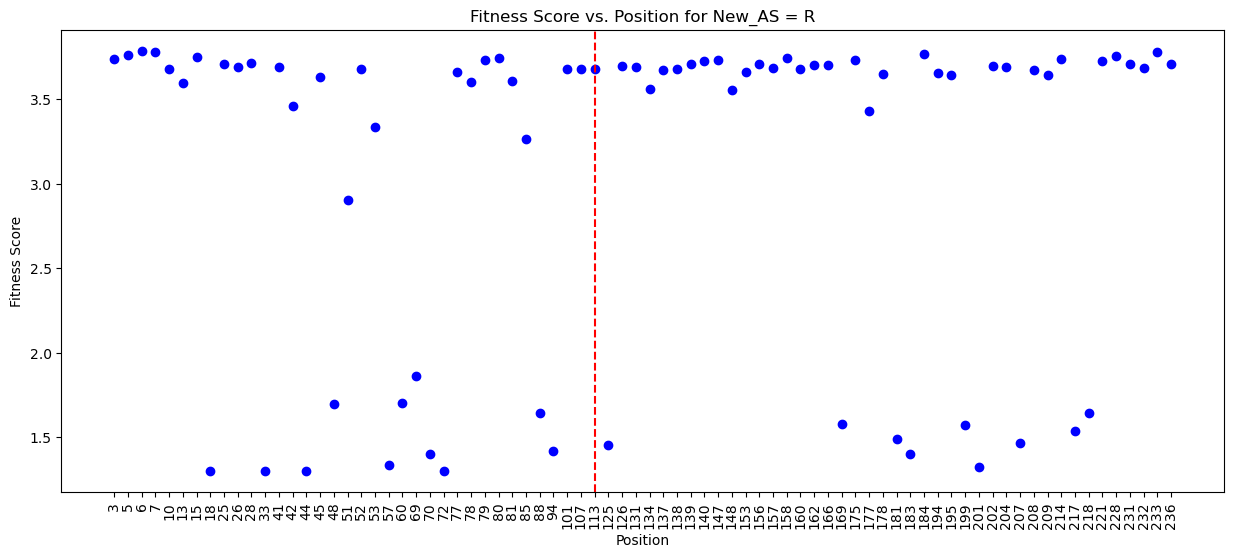

In [36]:
import matplotlib.pyplot as plt

gesuchte_AS = "R"
maske_gesuchte_AS = Roman_1["New_AS"] == gesuchte_AS
gesuchte_AS_df = Roman_1[maske_gesuchte_AS]

plt.scatter(gesuchte_AS_df["Position"], gesuchte_AS_df["Fitness_Score"], color='b')
plt.xlabel("Position")
plt.ylabel("Fitness Score")
plt.title(f"Fitness Score vs. Position for New_AS = {gesuchte_AS}")
plt.xticks(rotation='vertical')
# Rotate the x-axis labels vertically
plt.gcf().set_size_inches(15, 6)
c_threshold_65 = 35
plt.axvline(c_threshold_65, color='red', linestyle='--', label='Threshold_65')
plt.show()
#Plots all the found positions of the previous AA-search with their corresponding dms-scores.

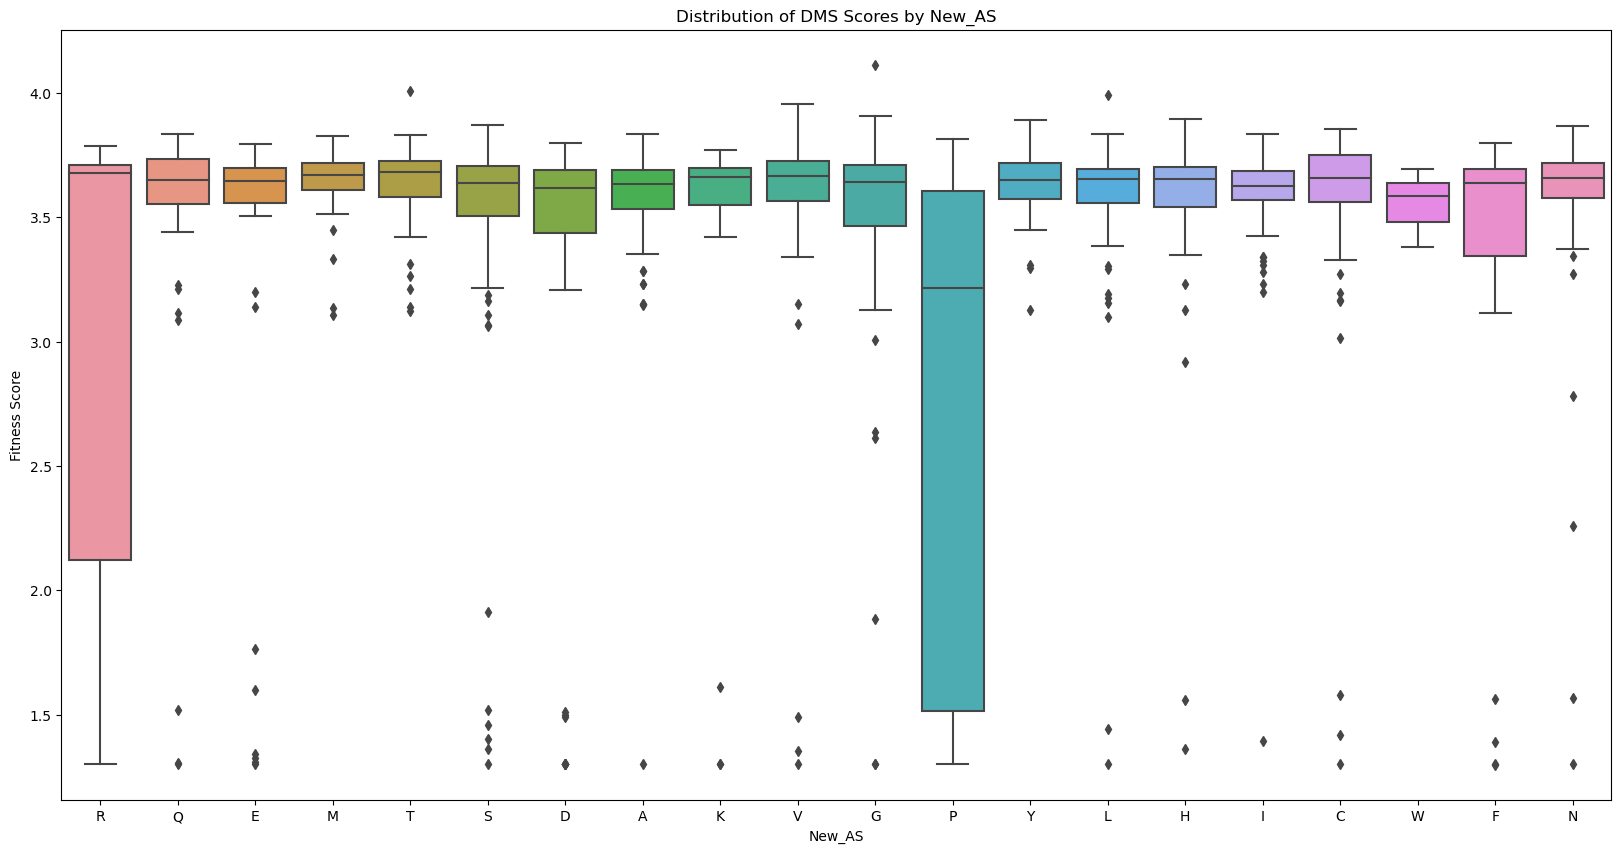

In [51]:
import seaborn as sns

# Assuming you have already grouped the data by mutation position
grouped_by_amino_acid = Roman_1.groupby('New_AS')

# Create an empty list to store the DMS scores for each group
dms_scores_per_group_new_AS = []

# Iterate over each group and extract the DMS scores
for position, group in grouped_by_amino_acid:
    dms_scores_per_group_new_AS.append(group['Fitness_Score'])

# Create a box plot
sns.boxplot(x='New_AS', y='Fitness_Score', data=Roman_1)
plt.xlabel('New_AS')
plt.ylabel('Fitness Score')
plt.title('Distribution of DMS Scores by New_AS')
#plt.xticks(range(0, len(grouped_by_amino_acid), 10))
plt.gcf().set_size_inches(20, 10)
plt.show()

#Box has 50% of all values, from the first quantile to the 3rd (25% to 75%)
#The whiskers reach from 0%-25% and 75%-100%. There are outliers visible.
#Arginine (R) and Proline (P) display big boxes, which means they have a high variance within their group. Therefore, mutations involving a Proline or Arginine have a broad range of dms-scores --> Interesting to analyse.
#It seems, that this effect of dms-score distribution is dependent of the position where the mutation occurs.
#This does not show, how many values each box contains, so if an amino acid only has few values, the boxplot does not convey reliable information.

In [38]:
#Examining the Chromophore

gesuchte_pos_65 = "65"
#Spezifische Position nach der ich suche
maske_gesuchte_pos_65 = Roman_1["Position"] == gesuchte_pos_65
#Macht eine boolean-Maske
gesuchte_pos_65_df = Roman_1[maske_gesuchte_pos_65]
#Alle Zeilen die meine Bedingung erfüllen werden geindext
print(gesuchte_pos_65_df)
#--------------------------------------------------------------------------------------------------------------------------
gesuchte_pos_66 = "66"
#Spezifische Position nach der ich suche
maske_gesuchte_pos_66 = Roman_1["Position"] == gesuchte_pos_66
#Macht eine boolean-Maske
gesuchte_pos_66_df = Roman_1[maske_gesuchte_pos_66]
#Alle Zeilen die meine Bedingung erfüllen werden geindext
print(gesuchte_pos_66_df)
#----------------------------------------------------------------------------------------------------------------------------
gesuchte_pos_67 = "67"
#Spezifische Position nach der ich suche
maske_gesuchte_pos_67 = Roman_1["Position"] == gesuchte_pos_67
#Macht eine boolean-Maske
gesuchte_pos_67_df = Roman_1[maske_gesuchte_pos_67]
#Alle Zeilen die meine Bedingung erfüllen werden geindext
print(gesuchte_pos_67_df)
#Out of the mutations we have available in our dataset, position 66 and 67 are completely deleterious. Position 65 experiences loss of function when mutated to proline, but maintains some activity when mutated to Leucine or Alanine, whilst a mutation to Threonine has the highest remaining activity. This is due to the necessary folding of the chromophore to achieve fluorescence.

      Position New_AS  Fitness_Score
30590       65      T       3.550427
30708       65      P       1.324287
30737       65      L       3.174363
30756       65      A       3.284241
      Position New_AS  Fitness_Score
30871       66      C       1.301031
30903       66      N       1.301031
30988       66      F       1.298941
      Position New_AS  Fitness_Score
31047       67      V       1.301547
31063       67      D       1.300841
31070       67      C       1.416921
31099       67      S       1.301030
